In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\nicky\Documents\BME 574 Julia`


In [2]:
Pkg.add(["CairoMakie","LinearAlgebra","Distributions","Convex","SCS","StatsPlots"])

   Resolving package versions...
  No Changes to `C:\Users\nicky\Documents\BME 574 Julia\Project.toml`
  No Changes to `C:\Users\nicky\Documents\BME 574 Julia\Manifest.toml`


In [3]:
using CairoMakie, LinearAlgebra, Statistics, Distributions, Convex, SCS, StatsPlots

Initialize design matrix

In [4]:
x = LinRange(0,4,100)

100-element LinRange{Float64, Int64}:
 0.0, 0.040404, 0.0808081, 0.121212, …, 3.87879, 3.91919, 3.9596, 4.0

In [5]:
col_list = Vector{Float64}[]
for p in 0:19
    push!(col_list, x .^ p)
end
A = reduce(hcat,col_list)

100×20 Matrix{Float64}:
 1.0  0.0         0.0          0.0          …  0.0          0.0
 1.0  0.040404    0.00163249   6.5959e-5       8.23467e-26  3.32714e-27
 1.0  0.0808081   0.00652995   0.000527672     2.15867e-20  1.74438e-21
 1.0  0.121212    0.0146924    0.00178089      3.19028e-17  3.86701e-18
 1.0  0.161616    0.0261198    0.00422138      5.65882e-15  9.14557e-16
 1.0  0.20202     0.0408122    0.00824488   …  3.14128e-13  6.34602e-14
 1.0  0.242424    0.0587695    0.0142472       8.36313e-12  2.02743e-12
 1.0  0.282828    0.0799918    0.022624        1.34095e-10  3.79257e-11
 1.0  0.323232    0.104479     0.033771        1.48343e-9   4.79491e-10
 1.0  0.363636    0.132231     0.0480841       1.23598e-8   4.49447e-9
 1.0  0.40404     0.163249     0.065959     …  8.23467e-8   3.32714e-8
 1.0  0.444444    0.197531     0.0877915       4.57841e-7   2.03485e-7
 1.0  0.484848    0.235078     0.113977        2.19234e-6   1.06295e-6
 ⋮                                          ⋱       

In [6]:
y = x .^2

100-element Vector{Float64}:
  0.0
  0.0016324864809713297
  0.006529945923885319
  0.014692378328741967
  0.026119783695541274
  0.040812162024283234
  0.05876951331496787
  0.07999183756759513
  0.1044791347821651
  0.1322314049586777
  0.16324864809713294
  0.19753086419753085
  0.23507805325987147
  ⋮
 12.641975308641975
 12.9309254157739
 13.223140495867767
 13.51862054892358
 13.817365574941332
 14.11937557392103
 14.424650545862667
 14.733190490766248
 15.044995408631774
 15.360065299459238
 15.67840016324865
 16.0

Error

In [7]:
# function to calculate error
function fit_error(A, y, coef)
    y_fit = A * coef
    return mean((y - y_fit).^2)
end

fit_error (generic function with 1 method)

Least Square Fit

In [8]:
# function to fit least square fit using the pseudo-inverse of the design matrix
function fitlq(A,y)
    Ainv = pinv(A)
    return Ainv * y
end

fitlq (generic function with 1 method)

In [9]:
# least squares fit via pseudo inverse
lsq_fit = []
lsq_error = []

for i in 0:99
    y1 = y + rand(Normal(0,0.1),length(y))
    lsq_fit = push!(lsq_fit, fitlq(A[:,1:20], y1))
    lsq_error = push!(lsq_error, fit_error(A, y, lsq_fit[i+1]))
end

In [10]:
lsq_fit

100-element Vector{Any}:
 [-0.12023319350833345, 1.1697582778620323, -2.523172531420041, 3.928487134665481, 0.2692558330916577, -2.680226027566455, -0.9863521994255962, 2.014851902705022, 1.7792272958412347, -1.387059852940709, -2.130504348443022, 1.4677809070753902, 1.8460865079784305, -2.9823447401016026, 1.8989326697581035, -0.7017695514918803, 0.16240877475910498, -0.023332634053009005, 0.0019121187913963833, -6.85480861712279e-5]
 [-0.05138231781510602, 0.6270178165343498, -2.9468187526078893, 6.726082655548119, -0.27197701233968363, -5.144552052774458, -1.7068857877114514, 3.8016013336546166, 3.355663021732486, -2.3929416807450536, -3.895391430548063, 2.4017440206095912, 3.3290608209557995, -5.0152422195040955, 3.0682900557223576, -1.0962660503280262, 0.2460057640016804, -0.034336437180301826, 0.002737852378102368, -9.561797669623083e-5]
 [-0.10123979687155135, 2.654695670938728, -9.977258771913398, 14.558717849061814, 0.6045361037607919, -10.538864154025248, -3.9203229968398006,

In [11]:
lsq_error

100-element Vector{Any}:
 0.002155649298664333
 0.0011211468060925535
 0.0028212343633006497
 0.001763201440133941
 0.0013836880104909663
 0.0008454937007931476
 0.0011680976208209037
 0.0022784205530058314
 0.0008950867202623653
 0.0016499393588861532
 0.0021022702821754074
 0.0024794094059121603
 0.0010421339159026885
 ⋮
 0.0013398608614534286
 0.0024397149868599184
 0.0007463814549844189
 0.0008509489933471997
 0.0019278384905398438
 0.001310979024538523
 0.0013167335719528417
 0.001252585674073522
 0.0015253146396184472
 0.0022104774676069846
 0.0019463758113983124
 0.0014477202590025859

In [12]:
# get coefficients
lsq_coef = [getindex.(lsq_fit,i) for i in 1:20]

20-element Vector{Vector{Float64}}:
 [-0.12023319350833345, -0.05138231781510602, -0.10123979687155135, -0.0545618096862599, 0.11182153127534719, -0.019309453394080522, -0.02191269215312125, -0.17414532358520624, 0.024161900835754826, 0.09961800562701473  …  -0.010856730640253553, 0.054924927937259754, -0.10692313843034373, 0.11118577414242642, 0.09799716376739995, 0.07514489985419202, -0.037085379590460724, -0.11955864380331908, 0.06989672158999538, 0.06281622119148259]
 [1.1697582778620323, 0.6270178165343498, 2.654695670938728, 0.39201912877489553, -1.9402097054248801, 0.7917497480257514, 0.3441352472463204, 2.870730402412143, 0.1651633121949554, -1.145948256247694  …  0.18670756586227588, -1.1234690943309231, 2.494726039413028, -0.8316898486276849, -0.07631150721462321, -0.9795455488342499, -0.1463019358041966, 1.6681048469357962, -0.2280647439256671, -0.3862849357923235]
 [-2.523172531420041, -2.9468187526078893, -9.977258771913398, 0.056068612238341586, 9.626266078417153, -1.4894

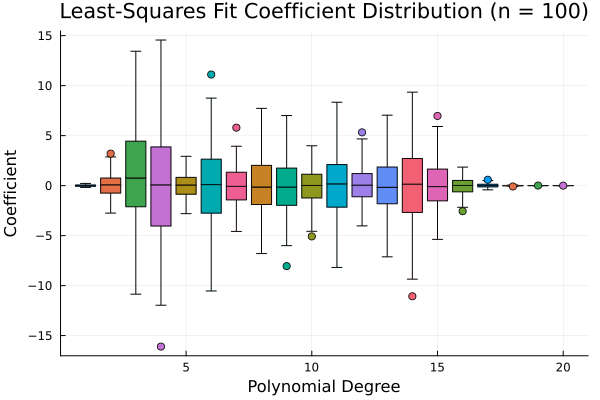

In [13]:
# graph lsq fit coefficients
StatsPlots.boxplot(lsq_coef, xlabel = "Polynomial Degree", ylabel = "Coefficient", title = "Least-Squares Fit Coefficient Distribution (n = 100)", legend = false)

Lasso Fit

In [14]:
# function to fit Lasso regression
function lasso(A,y,λ1,λ2)
    x = Variable(size(A)[2])
    problem = minimize(norm(A*x-y,2) + λ1*norm(x,1) + λ2*norm(x,2))
    solve!(problem, SCS.Optimizer; silent=true)
    return vec(evaluate(x))
end

lasso (generic function with 1 method)

In [15]:
# lasso fit
lasso_fit = []
lasso_error = []

for i in 0:99
    y1 = y + rand(Normal(0,0.1),length(y))
    lasso_fit = push!(lasso_fit, lasso(A[:,1:20], y1, 0.1, 0))
    lasso_error = push!(lasso_error, fit_error(A, y, lasso_fit[i+1]))
end

In [16]:
lasso_fit

100-element Vector{Any}:
 [0.002093697631995026, 0.0005965593808973162, 0.0008848664649204728, 0.03694895632380099, 0.09245918567285714, 0.11728288101401503, 0.06243689021858626, -3.601096923321436e-10, -1.0965766617032401e-9, -2.305146441570353e-9, -0.01773748077344113, -3.83243174191658e-9, -3.8292915380308225e-9, 0.005168300206758719, 1.866269931368423e-9, -0.0030095385351193217, 0.0017326355559768832, -0.0004366170624850821, 5.361392492818422e-5, -2.6268701979548386e-6]
 [0.1771599318635349, 0.16297748247134805, 0.1587545913802955, 0.1541357232703349, 0.13866557659436007, 0.0981689751228876, 0.022055011081351644, -1.3016023244819716e-9, -0.015791041881915702, -0.015240871981847877, -6.340604261232133e-6, -2.3570827016806767e-9, 0.004500208927958572, -9.043147318530732e-10, -0.0012566241736015832, 5.109747238431359e-10, 0.0003039542003067098, -0.00011123417025539726, 1.6181618469736358e-5, -8.725435001616131e-7]
 [0.10649708175905448, 0.11298736478615382, 0.12142542575558184, 0.1346

In [17]:
lasso_error

100-element Vector{Any}:
 0.11438964507737678
 0.015124963479924093
 0.07385935752640949
 0.011256772893509388
 0.03460819580895313
 0.02200187582411818
 0.008337204266000507
 0.11157936076213476
 0.008884328893478483
 0.02248261122551795
 0.02679690793431114
 0.00902843217872486
 0.011950736820753037
 ⋮
 0.038260745921243566
 0.01467251218358987
 0.027023282098734166
 0.016105280976644126
 0.02549168599264654
 0.01138889970439479
 0.028985614637845165
 0.011751319931146911
 0.029490425010439445
 0.020865021029175156
 0.017964257463609717
 0.012151763107560644

In [18]:
lasso_coef = [getindex.(lasso_fit,i) for i in 1:20]

20-element Vector{Vector{Float64}}:
 [0.002093697631995026, 0.1771599318635349, 0.10649708175905448, 0.19817117409727686, 0.11705202501323995, 0.12714520535467932, 0.1707431699343956, 0.014755812614812956, 0.1622013390450372, 0.21249802131348403  …  0.18793641951191764, 0.1656854021900217, 0.2034548889230612, 0.15099085958606234, 0.19745250156857844, 0.17102397924799756, 0.18355879482867718, 0.11946665251817878, 0.1477967045404373, 0.1834686655231317]
 [0.0005965593808973162, 0.16297748247134805, 0.11298736478615382, 0.18136742897962246, 0.11709709980899294, 0.11284379279166916, 0.17500451531666883, 0.006922893875952721, 0.14846495879110144, 0.18994973311463695  …  0.18802117444045643, 0.15510236914308356, 0.19187403342426398, 0.13977584247884364, 0.18933167276663565, 0.1532873344313799, 0.1850589249562395, 0.10955526532016321, 0.12508076032325105, 0.16256529596437616]
 [0.0008848664649204728, 0.1587545913802955, 0.12142542575558184, 0.17592007013798025, 0.12255825711793786, 0.11620215

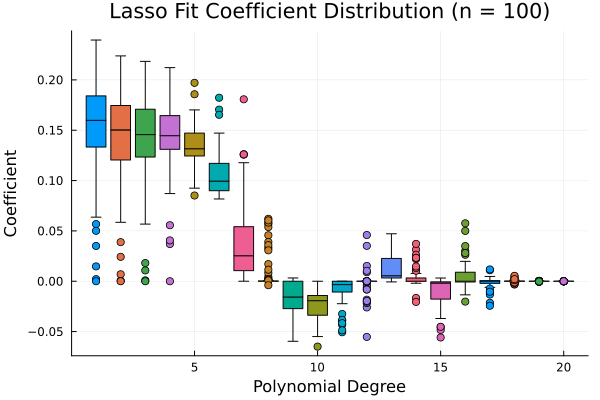

In [19]:
# graph lasso fit coefficients
StatsPlots.boxplot(lasso_coef, xlabel = "Polynomial Degree", ylabel = "Coefficient", title = "Lasso Fit Coefficient Distribution (n = 100)", legend = false)

Error Plots

Note: Strange that the Lasso resulted in a higher error. Perhaps the lasso function from class is not that great.

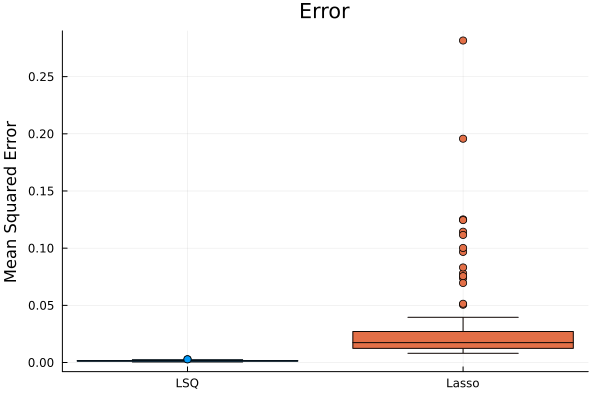

In [20]:
StatsPlots.boxplot([lsq_error, lasso_error], legend = false, ylabel = "Mean Squared Error", title = "Error", xticks=(1:2, ["LSQ", "Lasso"]))